In [1]:
# load libraies

%run py_libraries.py

/Users/4476224/.local/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.13.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# loading utility files

from utility.sv_fig import savefig
from utility.make_cm import make_confusion_matrix
from utility.get_g_result import get_gamma_results
from utility.plt_result import plot_results

In [3]:
def savefig(filename, crop = True):
    plt.savefig('{}.pdf'.format(filename))

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

# load data
X_train = pd.read_csv('data/norm_X_train_NCa_Ca.csv')
X_test = pd.read_csv('data/norm_X_test_NCa_Ca.csv')
y_train = pd.read_csv('data/y_train_NCa_Ca.csv')
y_test = pd.read_csv('data/y_test_NCa_Ca.csv')


print(X_train.shape)

(91, 26)


In [5]:


feats = ['IFN.y_T1', 'IL.10_T1', 'IL.6_T1', 'IL.8_T1', 'MCP.1_T1', 'MDC_T1', 'MIP.1a_T1', 'TNF.a_T1', 'G.CSF_T1', 
                'IL.22_T1', 'Insulin_T1', 'Leptin_T1', 'HGF_T1', 'MMP.2_T1', 'Adiponectin_T1', 'CRP_T1', 'GDF.15_T1', 
                'TIMP.1_T1', 'TGF.B2_T1', 'TGF.B1_T1', 'CA19.9_T1', 'Glucose_T1', 'HDL_T1', 'CCK_T1', 'LDL_T1', 'Triglyceride_T1']

feat_labels = feats

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 1
X_trainA1, X_testA1, y_trainA1, y_testA1 = train_test_split(X_train, y_train, test_size = 0.30, random_state=1,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)

# Train the classifier
clf.fit(X_trainA1, y_trainA1)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA1, y_testA1)))

ft_list1 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list1.append(feature[0])
print(ft_list1)

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5


Accuracy on test data: 0.75
[0.02287475269158149, 0.020161386371135983, 0.02988451244426052, 0.050821719780663493, 0.036960159521596016, 0.017811717517155, 0.03553081778974634, 0.05842619431069584, 0.02784512467038542, 0.04521504042297343, 0.04228507950127513, 0.022087721758002492, 0.06429524309913738, 0.028235881296376792, 0.03913236820545764, 0.03819222800959833, 0.10428805004527074, 0.0603028313130096, 0.0362174148800499, 0.011705139681060505, 0.051437496458013626, 0.038408449823936465, 0.01552358508833038, 0.016573433068076474, 0.0710512128756308, 0.01473243937658013]


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 2
X_trainA2, X_testA2, y_trainA2, y_testA2 = train_test_split(X_train, y_train, test_size = 0.30, random_state=12,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)         

# Train the classifier
clf.fit(X_trainA2, y_trainA2)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA2, y_testA2)))

# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, clf.feature_importances_):
#     print(feature)
    
ft_list2 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list2.append(feature[0])
print(ft_list2)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5


Accuracy on test data: 0.82
[0.01843585186432614, 0.0377578342095519, 0.029131331541419975, 0.05709110348041711, 0.027263074543314413, 0.011740575895387566, 0.028443707684683402, 0.02713909916004682, 0.026262381657633904, 0.05724547964872905, 0.10930948923727532, 0.028303673091188603, 0.07175127026981128, 0.03361063794954338, 0.04874761394131561, 0.05787294158068976, 0.06378974903424028, 0.03781299932144336, 0.03411349776856175, 0.022597337690846642, 0.04098572263259538, 0.026936689607624794, 0.023194613376080045, 0.018711351006110485, 0.03421584753832, 0.027536126268843036]


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 3
X_trainA3, X_testA3, y_trainA3, y_testA3 = train_test_split(X_train, y_train, test_size = 0.30, random_state=123,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)

# Train the classifier
clf.fit(X_trainA3, y_trainA3)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA3, y_testA3)))

# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, clf.feature_importances_):
#     print(feature)
    
ft_list3 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list3.append(feature[0])
print(ft_list3)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5


Accuracy on test data: 0.79
[0.02928164152015142, 0.03918888733090393, 0.02742447005797186, 0.03416197866905871, 0.03062771122690308, 0.01809253011167625, 0.030147174167501116, 0.057636215186724654, 0.027793367218688046, 0.04264753786828342, 0.0719601638357734, 0.0211867739247701, 0.06456692747820145, 0.044578440732612294, 0.04157459813405174, 0.0568553764410534, 0.056347606983206004, 0.03533047022267161, 0.03588786104003053, 0.028689906119896955, 0.03698201462009029, 0.06307164646854968, 0.032799739242000914, 0.0189216356656523, 0.03472517730000538, 0.019520148433571603]


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 4
X_trainA4, X_testA4, y_trainA4, y_testA4 = train_test_split(X_train, y_train, test_size = 0.30, random_state=1234,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)        

# Train the classifier
clf.fit(X_trainA4, y_trainA4)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA4, y_testA4)))

# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, clf.feature_importances_):
#     print(feature)
    
ft_list4 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list4.append(feature[0])
print(ft_list4)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5


Accuracy on test data: 0.79
[0.024170454325584304, 0.021264688418402598, 0.02057860811468522, 0.05373424727708923, 0.02882181285477311, 0.0212219601884268, 0.051959027217351, 0.059648759885696866, 0.025581617203951326, 0.07504794737766918, 0.06937786111252728, 0.02750199827272448, 0.03928691407348593, 0.03163751875923918, 0.05673216199436455, 0.028481119252814185, 0.08933685665222248, 0.04516919477662609, 0.03476009337306221, 0.016827934326700336, 0.0400381437879706, 0.03816090475129386, 0.03231378821144671, 0.017457807974174566, 0.03255890293267981, 0.01832967688503813]


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 5
X_trainA5, X_testA5, y_trainA5, y_testA5 = train_test_split(X_train, y_train, test_size = 0.30, random_state=12345,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)          

# Train the classifier
clf.fit(X_trainA5, y_trainA5)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA5, y_testA5)))

# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, clf.feature_importances_):
#     print(feature)
    
ft_list5 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list5.append(feature[0])
print(ft_list5)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5


Accuracy on test data: 0.75
[0.020633191635370213, 0.016083075722666908, 0.028237890429861013, 0.04925596741287465, 0.04052306838553139, 0.027858607505551528, 0.03337865277539526, 0.06495639034215125, 0.018147470153242674, 0.028522861908394943, 0.033153015762359316, 0.019560157800900174, 0.04070595189280379, 0.040130593281787155, 0.04337627506345369, 0.07015310220240474, 0.08557347915713874, 0.08733158429037581, 0.028024149706317624, 0.019807005960686366, 0.05011992317778437, 0.03281332350727844, 0.020010606699249544, 0.025264790633757903, 0.05669538485483134, 0.019683479737831206]


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 6
X_trainA6, X_testA6, y_trainA6, y_testA6 = train_test_split(X_train, y_train, test_size = 0.30, random_state=123456,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)

# Train the classifier
clf.fit(X_trainA6, y_trainA6)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA6, y_testA6)))

# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, clf.feature_importances_):
#     print(feature)
    
ft_list6 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list6.append(feature[0])
print(ft_list6)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5


Accuracy on test data: 0.86
[0.02657618747962828, 0.028684547911747772, 0.028129880827788608, 0.046957520063934034, 0.02722127074956348, 0.02361723761547294, 0.05606856007202883, 0.07343357926119677, 0.018474265880177206, 0.039458836197958765, 0.08644929768423797, 0.026302188903657063, 0.055771307351757414, 0.03914638273994503, 0.03310771795829663, 0.08079911056158513, 0.04596259888072267, 0.05010819970237683, 0.027318368610894716, 0.024380949548691185, 0.03483308359663487, 0.017170714412474617, 0.026071509378787744, 0.018046693002311726, 0.0499371395180058, 0.0159728520901239]


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 7
X_trainA7, X_testA7, y_trainA7, y_testA7 = train_test_split(X_train, y_train, test_size = 0.30, random_state=1234567,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)

# Train the classifier
clf.fit(X_trainA7, y_trainA7)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA7, y_testA7)))

# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, clf.feature_importances_):
#     print(feature)
    
ft_list7 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list7.append(feature[0])
print(ft_list7)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5


Accuracy on test data: 0.75
[0.02236411820827952, 0.029289713742592538, 0.019016737652356695, 0.06369932232829899, 0.034631398294387966, 0.02050530142405686, 0.058100405233552116, 0.04490228181706731, 0.018407887894658803, 0.025557201520731206, 0.05837448685695202, 0.04000567337892336, 0.06931142459078764, 0.04177631563905864, 0.0493992975055776, 0.0457468860428039, 0.06670056454859584, 0.054902602793234945, 0.048884676560145175, 0.021528315608155366, 0.028684448125579173, 0.020658145627040853, 0.0650699730078747, 0.014406767444947446, 0.02327708395909924, 0.014798970195242143]


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 8
X_trainA8, X_testA8, y_trainA8, y_testA8 = train_test_split(X_train, y_train, test_size = 0.30, random_state=12345678,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)

# Train the classifier
clf.fit(X_trainA8, y_trainA8)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA8, y_testA8)))

# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, clf.feature_importances_):
#     print(feature)
    
ft_list8 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list8.append(feature[0])
print(ft_list8)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5


Accuracy on test data: 0.75
[0.022797902130377655, 0.015826188720584417, 0.020592008735786874, 0.031712721659082434, 0.0500803774123342, 0.02114170933240032, 0.035234602311174104, 0.07819953106858572, 0.01729187115038294, 0.0556473824495029, 0.06813441419871213, 0.019538477491606, 0.05107285630720512, 0.03836273367331302, 0.0374097380234031, 0.03895489235278941, 0.09100914584207807, 0.08775991675763987, 0.021663729623294787, 0.019936456792309754, 0.05507876929553327, 0.041160180220422046, 0.012772145470334381, 0.02283388194185211, 0.02750178374408646, 0.018286583295208887]


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 9
X_trainA9, X_testA9, y_trainA9, y_testA9 = train_test_split(X_train, y_train, test_size = 0.30, random_state=123456789,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)

# Train the classifier
clf.fit(X_trainA9, y_trainA9)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA9, y_testA9)))

# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, clf.feature_importances_):
#     print(feature)
    
ft_list9 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list9.append(feature[0])
print(ft_list9)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5


Accuracy on test data: 0.75
[0.021498658701023545, 0.02045580461704617, 0.021005635022830507, 0.028101900958531753, 0.04968070217000994, 0.018583952584729543, 0.030877749320681352, 0.022155508922869112, 0.025209748162128252, 0.043951812648459015, 0.09361224940842851, 0.025031654296688716, 0.058748142860496684, 0.03162479334189543, 0.03328043410223287, 0.04184908765097428, 0.1069467984183664, 0.07631115833493059, 0.04355265740476433, 0.015535353697386657, 0.04051510234278625, 0.02563300309392619, 0.026151983079004168, 0.026249650965129847, 0.05578487973005066, 0.017651578164629197]


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# feature selection with random forest random seed 10
X_trainA10, X_testA10, y_trainA10, y_testA10 = train_test_split(X_train, y_train, test_size = 0.30, random_state=1234567890,stratify=y_train)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=500, random_state=1234, n_jobs=-1)

# Train the classifier
clf.fit(X_trainA10, y_trainA10)

print("Accuracy on test data: {:.2f}".format(clf.score(X_testA10, y_testA10)))

# # Print the name and gini importance of each feature
# for feature in zip(feat_labels, clf.feature_importances_):
#     print(feature)
    
ft_list10 = []
# Print the name and gini importance of each feature
for feature in zip(clf.feature_importances_):
    #print(feature[0])
    ft_list10.append(feature[0])
print(ft_list10)
    
tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5


Accuracy on test data: 0.75
[0.01828547701535658, 0.035570128749786906, 0.01680218394735614, 0.04904217821420106, 0.02754305696689592, 0.017785529542545492, 0.03621356278408968, 0.036265913238525314, 0.042687276387997054, 0.06735402839192842, 0.09469485339012856, 0.027812693100737893, 0.036977826960901974, 0.03210811344523636, 0.034793728880666966, 0.06467406201929413, 0.06810453681146103, 0.08104203324284971, 0.035193024588297414, 0.02296051400010676, 0.024451284317571927, 0.03424604223058652, 0.03527518153974821, 0.021083176096513594, 0.023179182294083743, 0.015854411843132576]


In [16]:
# Python code to sort the tuples using second element
# of sublist Function to sort using sorted()

def Sort_2col(sub_li):
    # reverse = None (Sorts in Ascending order)
    # key is set to sort using second element of
    # sublist lambda has been used
    return(sorted(sub_li, key=lambda x: x[1], reverse = True))


In [17]:
def bootstrap_sample(X, y):
    n = len(X)
    rng = np.random.default_rng()
    bootstrap_indices = rng.choice(range(n), size=int(n*0.8), replace=False)
    bootstrap_sample_X = X.iloc[bootstrap_indices].reset_index(drop=True)
    bootstrap_sample_y = y[bootstrap_indices]
    
    return bootstrap_sample_X, bootstrap_sample_y

In [18]:
# Does the bootstrap sampling on the data
def bootstrap_sampling(X_train, y_train, X_val, y_val):
    bt1_x_tr, bt1_y_tr = bootstrap_sample(X_train, y_train)
    bt1_x_val, bt1_y_val = bootstrap_sample(X_val, y_val)
    return bt1_x_tr, bt1_y_tr, bt1_x_val, bt1_y_val

In [19]:
#### Obtain FIS from random forest (5 cvs)

Xt1_bt1 = X_trainA1 ; Xv1_bt1 = X_testA1 ; yt1_bt1 = y_trainA1 ; yv1_bt1 = y_testA1 
Xt1_bt2 = X_trainA2 ; Xv1_bt2 = X_testA2 ; yt1_bt2 = y_trainA2 ; yv1_bt2 = y_testA2 
Xt1_bt3 = X_trainA3 ; Xv1_bt3 = X_testA3 ; yt1_bt3 = y_trainA3 ; yv1_bt3 = y_testA3 
Xt1_bt4 = X_trainA4 ; Xv1_bt4 = X_testA4 ; yt1_bt4 = y_trainA4 ; yv1_bt4 = y_testA4 
Xt1_bt5 = X_trainA5 ; Xv1_bt5 = X_testA5 ; yt1_bt5 = y_trainA5 ; yv1_bt5 = y_testA5 

Xt2_bt1 = X_trainA6 ; Xv2_bt1 = X_testA6 ; yt2_bt1 = y_trainA6 ; yv2_bt1 = y_testA6 
Xt2_bt2 = X_trainA7 ; Xv2_bt2 = X_testA7 ; yt2_bt2 = y_trainA7 ; yv2_bt2 = y_testA7 
Xt2_bt3 = X_trainA8 ; Xv2_bt3 = X_testA8 ; yt2_bt3 = y_trainA8 ; yv2_bt3 = y_testA8 
Xt2_bt4 = X_trainA9 ; Xv2_bt4 = X_testA9 ; yt2_bt4 = y_trainA9 ; yv2_bt4 = y_testA9 
Xt2_bt5 = X_trainA10; Xv2_bt5 = X_testA10; yt2_bt5 = y_trainA10; yv2_bt5 = y_testA10 

# bt1
rf_1 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt1, yt1_bt1)
#rf_1 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt1, yt1_bt1)
list_rf_10 = []
list_rf_101 = []
for feature in zip(feat_labels, rf_1.feature_importances_):
    list_rf_10.append(feature[1])
    list_rf_101.append(feature)

print(' ')
# print(list_rf_10)
print(list_rf_101)
    
# bt2
rf_2 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt2, yt1_bt2)
#rf_2 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt2, yt1_bt2)
list_rf_20 = []
list_rf_201 = []
for feature in zip(feat_labels, rf_2.feature_importances_):
    list_rf_20.append(feature[1])
    list_rf_201.append(feature)

print(' ')
# print(list_rf_20)
print(list_rf_201)
    
# bt3
rf_3 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt3, yt1_bt3)
#rf_3 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt3, yt1_bt3)
list_rf_30 = []
list_rf_301 = []
for feature in zip(feat_labels, rf_3.feature_importances_):
    list_rf_30.append(feature[1])
    list_rf_301.append(feature)
    
# bt4
rf_4 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt4, yt1_bt4)
#rf_4 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt4, yt1_bt4)
list_rf_40 = []
list_rf_401 = []
for feature in zip(feat_labels, rf_4.feature_importances_):
    list_rf_40.append(feature[1])
    list_rf_401.append(feature)
    
# bt5
rf_5 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt5, yt1_bt5)
#rf_5 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt1_bt5, yt1_bt5)
list_rf_50 = []
list_rf_501 = []
for feature in zip(feat_labels, rf_5.feature_importances_):
    list_rf_50.append(feature[1])
    list_rf_501.append(feature)
    
# bt6
rf_6 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt1, yt2_bt1)
#rf_6 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt1, yt2_bt1)
list_rf_60 = []
list_rf_601 = []
for feature in zip(feat_labels, rf_6.feature_importances_):
    list_rf_60.append(feature[1])
    list_rf_601.append(feature)
    
# bt7
rf_7 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt2, yt2_bt2)
#rf_7 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt2, yt2_bt2)
list_rf_70 = []
list_rf_701 = []
for feature in zip(feat_labels, rf_7.feature_importances_):
    list_rf_70.append(feature[1])
    list_rf_701.append(feature)

# bt8
rf_8 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt3, yt2_bt3)
#rf_8 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt3, yt2_bt3)
list_rf_80 = []
list_rf_801 = []
for feature in zip(feat_labels, rf_8.feature_importances_):
    list_rf_80.append(feature[1])
    list_rf_801.append(feature)
    
# bt9
rf_9 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt4, yt2_bt4)
#rf_9 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt4, yt2_bt4)
list_rf_90 = []
list_rf_901 = []
for feature in zip(feat_labels, rf_9.feature_importances_):
    list_rf_90.append(feature[1])
    list_rf_901.append(feature)
    
# bt10
rf_10 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt5, yt2_bt5)
#rf_10 = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xt2_bt5, yt2_bt5)
list_rf_100 = []
list_rf_1001 = []
for feature in zip(feat_labels, rf_10.feature_importances_):
    list_rf_100.append(feature[1])
    list_rf_1001.append(feature)
    


 
[('IFN.y_T1', 0.02179751193722571), ('IL.10_T1', 0.028816757823200565), ('IL.6_T1', 0.03052819122979003), ('IL.8_T1', 0.04852825604467961), ('MCP.1_T1', 0.03533071038099451), ('MDC_T1', 0.02198599202699636), ('MIP.1a_T1', 0.03483374489313755), ('TNF.a_T1', 0.058498962757840944), ('G.CSF_T1', 0.025979815830483068), ('IL.22_T1', 0.04567350263632197), ('Insulin_T1', 0.050790883737753645), ('Leptin_T1', 0.018973692691373948), ('HGF_T1', 0.059133280038308506), ('MMP.2_T1', 0.033855994272009096), ('Adiponectin_T1', 0.04057592220242193), ('CRP_T1', 0.04267640164311882), ('GDF.15_T1', 0.10065847099733806), ('TIMP.1_T1', 0.06765750597944825), ('TGF.B2_T1', 0.027287579092006405), ('TGF.B1_T1', 0.0139218791226151), ('CA19.9_T1', 0.05387793579378878), ('Glucose_T1', 0.033645680780441535), ('HDL_T1', 0.017163231975602246), ('CCK_T1', 0.015339223358892533), ('LDL_T1', 0.05898761188636421), ('Triglyceride_T1', 0.013481260867846638)]
 
[('IFN.y_T1', 0.02032268998608378), ('IL.10_T1', 0.0328624433109

In [20]:
# mean of all feats

mean_list_0 = []
mean_list_1 = []
std_list_0 = []
std_list_1 = []

# Iterate through the indices of the lists (assuming they all have the same length)
for i in range(len(list_rf_101)):
    # Extract corresponding elements from each list
    element1 = list_rf_101[i][1]
    element2 = list_rf_201[i][1]
    element3 = list_rf_301[i][1]
    element4 = list_rf_401[i][1]
    element5 = list_rf_501[i][1]
    element6 = list_rf_601[i][1]
    element7 = list_rf_701[i][1]
    element8 = list_rf_801[i][1]
    element9 = list_rf_901[i][1]
    element10 = list_rf_1001[i][1]

    # Calculate the mean of the elements
    mean_value = np.mean([element1, element2, element3, element4, element5, element6, element7, element8, element9, element10])
    
    # Calculate the std of the elements
    std_value = np.std([element1, element2, element3, element4, element5, element6, element7, element8, element9, element10])

    # Append the mean to the mean_list
    
    mean_list_0.append(list_rf_101[i][0])
    mean_list_1.append(mean_value)
    
    # Append the std to the std_list
    std_list_0.append(list_rf_101[i][0])
    std_list_1.append(std_value)

print(' ')
# Print the resulting mean_std_list
mean_std_list = list(zip(mean_list_0,mean_list_1,std_list_1))
print(mean_std_list)

print(' ')
# sort feats using the FIS score
s_mean_std_list = Sort_2col(mean_std_list)
print(s_mean_std_list)



 
[('IFN.y_T1', 0.022150282163722855, 0.0028604241050753355), ('IL.10_T1', 0.02708413579987909, 0.0057175731756125186), ('IL.6_T1', 0.023242704063990947, 0.005476102011918132), ('IL.8_T1', 0.04554333271649362, 0.01003984940560637), ('MCP.1_T1', 0.035215244087526666, 0.006796545925234025), ('MDC_T1', 0.019703147056484523, 0.0025157607599873865), ('MIP.1a_T1', 0.037825351356506484, 0.009836759111901258), ('TNF.a_T1', 0.05349735859102014, 0.019143070236443304), ('G.CSF_T1', 0.025418889163114085, 0.00741159212881356), ('IL.22_T1', 0.05194521315666263, 0.01645298389841381), ('Insulin_T1', 0.07480798336275685, 0.02119175654601582), ('Leptin_T1', 0.025542803777620783, 0.006540313246651616), ('HGF_T1', 0.051243745818488395, 0.010461618188046555), ('MMP.2_T1', 0.034841687914207733, 0.00448932568601586), ('Adiponectin_T1', 0.04029548920374325, 0.006771057195017737), ('CRP_T1', 0.05778821752430108, 0.01641300145706862), ('GDF.15_T1', 0.07475356289958582, 0.01843205465153793), ('TIMP.1_T1', 0.0637

In [21]:
s_features = []

for i in range(len(s_mean_std_list)):
    s_features.append(s_mean_std_list[i][0])

print(s_features)

['Insulin_T1', 'GDF.15_T1', 'TIMP.1_T1', 'CRP_T1', 'TNF.a_T1', 'IL.22_T1', 'HGF_T1', 'IL.8_T1', 'Adiponectin_T1', 'CA19.9_T1', 'LDL_T1', 'MIP.1a_T1', 'TGF.B2_T1', 'MCP.1_T1', 'Glucose_T1', 'MMP.2_T1', 'HDL_T1', 'IL.10_T1', 'Leptin_T1', 'G.CSF_T1', 'IL.6_T1', 'IFN.y_T1', 'CCK_T1', 'TGF.B1_T1', 'MDC_T1', 'Triglyceride_T1']


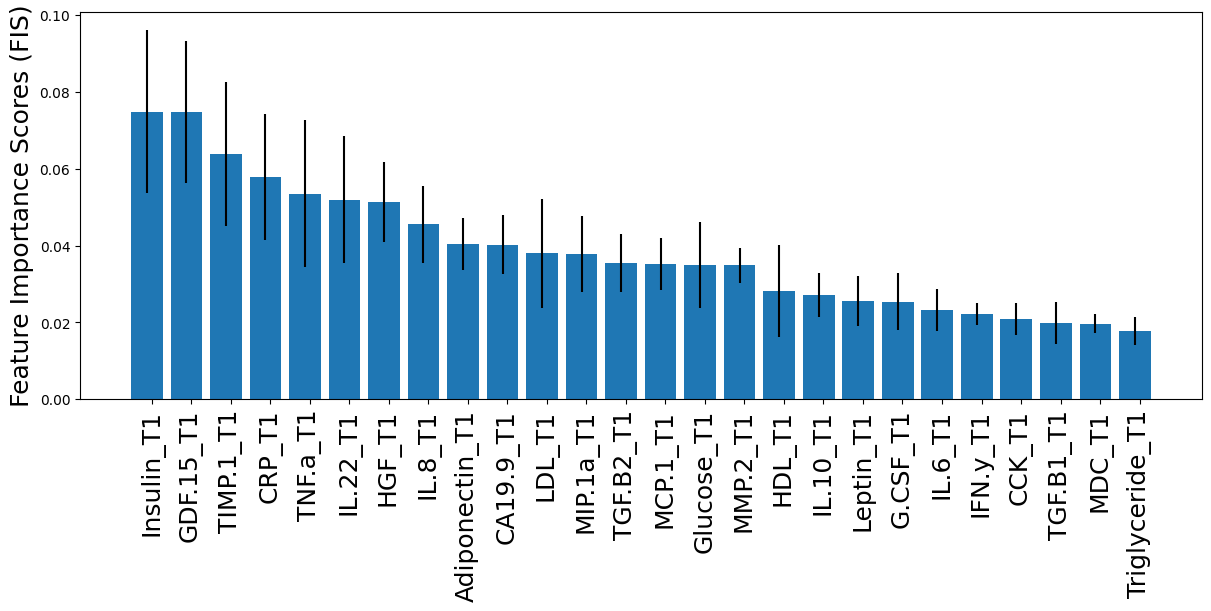

In [22]:
x = np.arange(len(s_mean_std_list))  # the label locations
width = 0.12  # the width of the bars
multiplier = 0

#print(x)

fig, ax = plt.subplots(layout='constrained', figsize=(12,6))

for i in range(len(s_mean_std_list)):
    ax.bar(s_mean_std_list[i][0], s_mean_std_list[i][1], yerr=s_mean_std_list[i][2], color='C0')
    # ax.barh(s_mean_std_list[i][0], s_mean_std_list[i][1], yerr=s_mean_std_list[i][2], color='C0')
    
ax.set_xticks(x + width, s_features, rotation='vertical', fontsize=18)
ax.set_ylabel('Feature Importance Scores (FIS)', fontsize=18)

# x = np.arange(len(s_mean_std_list))  # the label locations
# width = 0.12  # the width of the bars
# multiplier = 0

# #print(x)

# fig, ax = plt.subplots(layout='constrained', figsize=(12,6))

# for i in range(len(s_mean_std_list)):
#     ax.bar(s_mean_std_list[i][0], s_mean_std_list[i][1], yerr=s_mean_std_list[i][2], color='C0')
#     # ax.barh(s_mean_std_list[i][0], s_mean_std_list[i][1], yerr=s_mean_std_list[i][2], color='C0')
    
# ax.set_xticks(x + width, s_features, rotation='vertical')
# ax.set_ylabel('Feature Importance Scores (FIS)')

savefig('./figs/NCa_Ca_ft')

In [23]:
#
Xt1_bt1 = Xt1_bt1.reset_index(); Xv1_bt1 = Xv1_bt1.reset_index(); yt1_bt1 = yt1_bt1.reset_index(); yv1_bt1 = yv1_bt1.reset_index()
Xt1_bt2 = Xt1_bt2.reset_index(); Xv1_bt2 = Xv1_bt2.reset_index(); yt1_bt2 = yt1_bt2.reset_index(); yv1_bt2 = yv1_bt2.reset_index()
Xt1_bt3 = Xt1_bt3.reset_index(); Xv1_bt3 = Xv1_bt3.reset_index(); yt1_bt3 = yt1_bt3.reset_index(); yv1_bt3 = yv1_bt3.reset_index()
Xt1_bt4 = Xt1_bt4.reset_index(); Xv1_bt4 = Xv1_bt4.reset_index(); yt1_bt4 = yt1_bt4.reset_index(); yv1_bt4 = yv1_bt4.reset_index()
Xt1_bt5 = Xt1_bt5.reset_index(); Xv1_bt5 = Xv1_bt5.reset_index(); yt1_bt5 = yt1_bt5.reset_index(); yv1_bt5 = yv1_bt5.reset_index()

Xt2_bt1 = Xt2_bt1.reset_index(); Xv2_bt1 = Xv2_bt1.reset_index(); yt2_bt1 = yt2_bt1.reset_index(); yv2_bt1 = yv2_bt1.reset_index()
Xt2_bt2 = Xt2_bt2.reset_index(); Xv2_bt2 = Xv2_bt2.reset_index(); yt2_bt2 = yt2_bt2.reset_index(); yv2_bt2 = yv2_bt2.reset_index()
Xt2_bt3 = Xt2_bt3.reset_index(); Xv2_bt3 = Xv2_bt3.reset_index(); yt2_bt3 = yt2_bt3.reset_index(); yv2_bt3 = yv2_bt3.reset_index()
Xt2_bt4 = Xt2_bt4.reset_index(); Xv2_bt4 = Xv2_bt4.reset_index(); yt2_bt4 = yt2_bt4.reset_index(); yv2_bt4 = yv2_bt4.reset_index()
Xt2_bt5 = Xt2_bt5.reset_index(); Xv2_bt5 = Xv2_bt5.reset_index(); yt2_bt5 = yt2_bt5.reset_index(); yv2_bt5 = yv2_bt5.reset_index()

#
Xv1_bt1 = Xv1_bt1.drop('index', axis=1); yv1_bt1 = yv1_bt1.drop('index', axis=1); Xt1_bt1 = Xt1_bt1.drop('index', axis=1); yt1_bt1 = yt1_bt1.drop('index', axis=1)
Xv1_bt2 = Xv1_bt2.drop('index', axis=1); yv1_bt2 = yv1_bt2.drop('index', axis=1); Xt1_bt2 = Xt1_bt2.drop('index', axis=1); yt1_bt2 = yt1_bt2.drop('index', axis=1)
Xv1_bt3 = Xv1_bt3.drop('index', axis=1); yv1_bt3 = yv1_bt3.drop('index', axis=1); Xt1_bt3 = Xt1_bt3.drop('index', axis=1); yt1_bt3 = yt1_bt3.drop('index', axis=1)
Xv1_bt4 = Xv1_bt4.drop('index', axis=1); yv1_bt4 = yv1_bt4.drop('index', axis=1); Xt1_bt4 = Xt1_bt4.drop('index', axis=1); yt1_bt4 = yt1_bt4.drop('index', axis=1)
Xv1_bt5 = Xv1_bt5.drop('index', axis=1); yv1_bt5 = yv1_bt5.drop('index', axis=1); Xt1_bt5 = Xt1_bt5.drop('index', axis=1); yt1_bt5 = yt1_bt5.drop('index', axis=1)

Xv2_bt1 = Xv2_bt1.drop('index', axis=1); yv2_bt1 = yv2_bt1.drop('index', axis=1); Xt2_bt1 = Xt2_bt1.drop('index', axis=1); yt2_bt1 = yt2_bt1.drop('index', axis=1)
Xv2_bt2 = Xv2_bt2.drop('index', axis=1); yv2_bt2 = yv2_bt2.drop('index', axis=1); Xt2_bt2 = Xt2_bt2.drop('index', axis=1); yt2_bt2 = yt2_bt2.drop('index', axis=1)
Xv2_bt3 = Xv2_bt3.drop('index', axis=1); yv2_bt3 = yv2_bt3.drop('index', axis=1); Xt2_bt3 = Xt2_bt3.drop('index', axis=1); yt2_bt3 = yt2_bt3.drop('index', axis=1)
Xv2_bt4 = Xv2_bt4.drop('index', axis=1); yv2_bt4 = yv2_bt4.drop('index', axis=1); Xt2_bt4 = Xt2_bt4.drop('index', axis=1); yt2_bt4 = yt2_bt4.drop('index', axis=1)
Xv2_bt5 = Xv2_bt5.drop('index', axis=1); yv2_bt5 = yv2_bt5.drop('index', axis=1); Xt2_bt5 = Xt2_bt5.drop('index', axis=1); yt2_bt5 = yt2_bt5.drop('index', axis=1)




In [24]:
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

datasets = [
    (Xt1_bt1, Xv1_bt1, yt1_bt1, yv1_bt1),
    (Xt1_bt2, Xv1_bt2, yt1_bt2, yv1_bt2),
    (Xt1_bt3, Xv1_bt3, yt1_bt3, yv1_bt3),
    (Xt1_bt4, Xv1_bt4, yt1_bt4, yv1_bt4),
    (Xt1_bt5, Xv1_bt5, yt1_bt5, yv1_bt5),
    (Xt2_bt1, Xv2_bt1, yt2_bt1, yv2_bt1),
    (Xt2_bt2, Xv2_bt2, yt2_bt2, yv2_bt2),
    (Xt2_bt3, Xv2_bt3, yt2_bt3, yv2_bt3),
    (Xt2_bt4, Xv2_bt4, yt2_bt4, yv2_bt4),
    (Xt2_bt5, Xv2_bt5, yt2_bt5, yv2_bt5),
]

# --- Store best-so-far accuracies for each replicate ---
acc_list_all = []

for Xt, Xv, yt, yv in datasets:
    yt = np.ravel(yt)  # ensure 1D
    yv = np.ravel(yv)
    
    acc_list = []
    # Start with first feature
    Xtr = Xt[[s_mean_std_list[0][0]]]
    Xte = Xv[[s_mean_std_list[0][0]]]
    rf = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xtr, yt)
    acc_list.append(rf.score(Xte, yv))
    
    # Add features sequentially
    for i in range(1, len(s_mean_std_list)):
        Xtr = pd.concat([Xtr, Xt[[s_mean_std_list[i][0]]]], axis=1)
        Xte = pd.concat([Xte, Xv[[s_mean_std_list[i][0]]]], axis=1)
        rf = RandomForestClassifier(n_estimators=1800, random_state=0).fit(Xtr, yt)
        acc_list.append(rf.score(Xte, yv))
    
    # Apply best-so-far smoothing
    acc_list_best = np.maximum.accumulate(acc_list)
    acc_list_all.append(acc_list_best)
    # acc_list_all.append(acc_list)

acc_array = np.array(acc_list_all)


# --- Mean ± 95% CI ---
mean_acc = acc_array.mean(axis=0)
ci95 = 1.96 * acc_array.std(axis=0, ddof=1) / np.sqrt(acc_array.shape[0])
x = np.arange(1, len(mean_acc) + 1)

# --- Find elbow ---
knee = KneeLocator(x, mean_acc, curve="concave", direction="increasing")
elbow_point = knee.knee


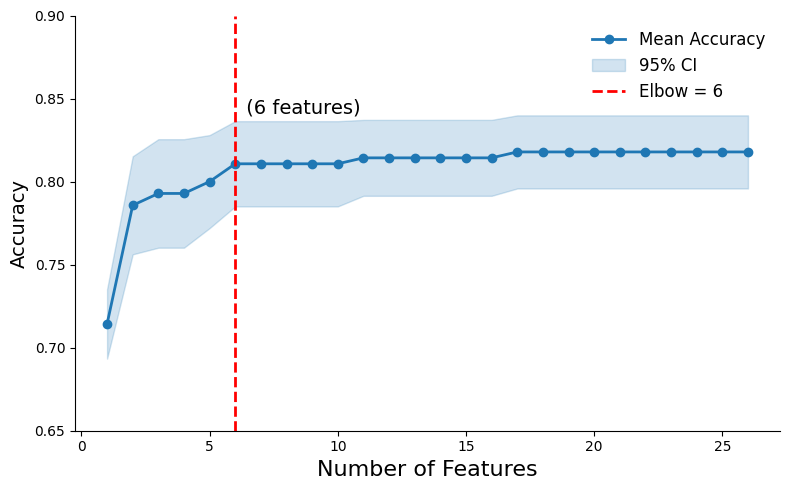

In [25]:
# --- Plot (Updated Formatting like Code B) ---
plt.figure(figsize=(8, 5))

plt.plot(x, mean_acc, marker='o', color='C0', linewidth=2, label='Mean Accuracy')
plt.fill_between(x, mean_acc - ci95, mean_acc + ci95, color='C0', alpha=0.2, label='95% CI')

if elbow_point is not None:
    plt.axvline(elbow_point, color='red', linestyle='--', lw=2, label=f'Elbow = {elbow_point}')
    plt.annotate(
        f' ({elbow_point} features) ',
        xy=(elbow_point, mean_acc[int(elbow_point)]),
        xytext=(elbow_point + 0.2, mean_acc[int(elbow_point)] + 0.03),
        arrowprops=None, fontsize=14
    )

plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim([0.65, 0.90])  # Adjust y-axis limits like Code B
# plt.grid(True)

# Remove top and right spines
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.legend(frameon=False, fontsize=12)
plt.tight_layout()

savefig('./figs/NCa_Ca_FFS')
# plt.show()
